#### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models 
from sklearn.ensemble import GradientBoostingRegressor

# train test split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

#### Data

In [2]:
# data
df = pd.read_csv("region_dataset.csv")

In [3]:
# feature reduction
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Pos_AM', 'Pos_CB', 'Pos_CF', 'Pos_CM', 'Pos_DF', 'Pos_DM', 'Pos_FW', 'Pos_FW,DF', 'Pos_FW,MF', 'Pos_LB', 'Pos_LM', 'Pos_LW', 'Pos_MF', 'Pos_MF,DF', 'Pos_RB', 'Pos_RM',	'Pos_RW', 'Pos_SS'], axis=1)

#### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9) 
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

#### Models

In [8]:
# Gradient Boosting Scaled
gb_scaled = GradientBoostingRegressor()
gb_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = gb_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (Scaled):", mae_scaled)

Mean Absolute Error (Scaled): 0.3728976454930235


In [9]:
# Gradient Boosting PCA 
gb_pca = GradientBoostingRegressor()
gb_pca.fit(x_train_pca, y_train)
y_pred_pca = gb_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.484010330503336


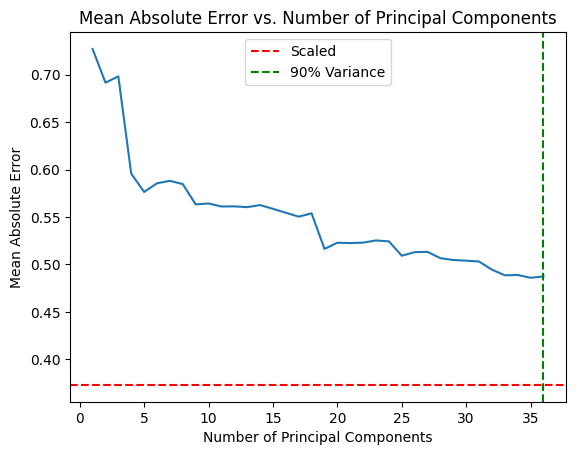

In [10]:
# Compare the performance of different numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    gb = GradientBoostingRegressor()
    gb.fit(x_train_pca, y_train)
    y_pred = gb.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(35, 0.4858416525170216)

In [12]:
mae_values

[0.7271821650489445,
 0.691591266829102,
 0.698247341308787,
 0.5956788928795482,
 0.5764175801686676,
 0.5854792164537407,
 0.5881104136869606,
 0.5846516909899492,
 0.5632920511943637,
 0.5642012572261952,
 0.5610388754096238,
 0.5611736359181361,
 0.5603681700011499,
 0.5625223000482994,
 0.5585998781197297,
 0.5544136346098967,
 0.5503416770479612,
 0.5537968797424857,
 0.5163045137438715,
 0.5228090060081249,
 0.5224841626307467,
 0.5229378354153256,
 0.5252290183557988,
 0.5242583151281646,
 0.5091508020540056,
 0.5129015223703437,
 0.5132006757945824,
 0.5064923206657568,
 0.5046179097061536,
 0.5039203436225829,
 0.503011791396039,
 0.4943810291446491,
 0.48848723261370414,
 0.48881650447672614,
 0.4858416525170216,
 0.48728644018733563]